In [121]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [122]:
df = pd.read_csv("bank_transaction_final.csv")
df

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/01/1994,F,JAMSHEDPUR,17819.05,02/08/2016,143207,25.0
1,T2,C2142763,04/04/1957,M,JHAJJAR,2270.69,02/08/2016,141858,27999.0
2,T3,C4417068,26/11/1996,F,MUMBAI,17874.44,02/08/2016,142712,459.0
3,T4,C5342380,14/09/1973,F,MUMBAI,866503.21,02/08/2016,142714,2060.0
4,T5,C9031234,24/03/1988,F,NAVI MUMBAI,6714.43,02/08/2016,181156,1762.5
...,...,...,...,...,...,...,...,...,...
5299,T5308,C2314489,17/01/1988,F,KOLKATA,16049.34,11/08/2016,202903,14013.0
5300,T5309,C8839050,1/1/1800,F,NAGPUR,113657.21,11/08/2016,200225,4719.0
5301,T5310,C6966125,19/03/1991,M,SURAT,5683.89,11/08/2016,200240,60.0
5302,T5311,C7137669,17/01/1992,M,TRIVANDRUM,8266.45,11/08/2016,202331,320.0


# EDA

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5304 entries, 0 to 5303
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            5304 non-null   object 
 1   CustomerID               5304 non-null   object 
 2   CustomerDOB              5290 non-null   object 
 3   CustGender               5301 non-null   object 
 4   CustLocation             5303 non-null   object 
 5   CustAccountBalance       5304 non-null   float64
 6   TransactionDate          5304 non-null   object 
 7   TransactionTime          5304 non-null   int64  
 8   TransactionAmount (INR)  5304 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 373.1+ KB


In [124]:
display(df.describe(), df.describe(include='object'))

,CustAccountBalance,TransactionTime,TransactionAmount (INR)
count,5.304000e+03,5304.000000,5304.000000
mean,1.167018e+05,168790.053167,1937.834493
std,5.509567e+05,44684.696034,7161.803484
min,0.000000e+00,400.000000,0.000000
25%,5.548690e+03,150913.500000,155.667500
50%,1.886812e+04,175003.000000,432.820000
75%,6.548649e+04,204430.250000,1200.000000
max,1.777298e+07,235855.000000,137890.000000


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,TransactionDate
count,5304,5304,5290,5301,5303,5304
unique,5304,5297,3503,2,795,36
top,T1,C5930770,1/1/1800,M,MUMBAI,21/10/2016
freq,1,2,334,3867,491,3534


In [125]:
df.isna().sum()

TransactionID               0
CustomerID                  0
CustomerDOB                14
CustGender                  3
CustLocation                1
CustAccountBalance          0
TransactionDate             0
TransactionTime             0
TransactionAmount (INR)     0
dtype: int64

In [126]:
df[df.duplicated() == True]

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)


In [128]:
df.dropna(inplace=True)

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5286 entries, 0 to 5303
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            5286 non-null   object 
 1   CustomerID               5286 non-null   object 
 2   CustomerDOB              5286 non-null   object 
 3   CustGender               5286 non-null   object 
 4   CustLocation             5286 non-null   object 
 5   CustAccountBalance       5286 non-null   float64
 6   TransactionDate          5286 non-null   object 
 7   TransactionTime          5286 non-null   int64  
 8   TransactionAmount (INR)  5286 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 413.0+ KB


In [130]:
df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])

# df['year_transaction'] = df['TransactionDate'].year
df

C:\Users\Asus\AppData\Local\Temp\ipykernel_23748\1645718751.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['TransactionDate'] = pd.to_datetime(df['TransactionDate'])
C:\Users\Asus\AppData\Local\Temp\ipykernel_23748\1645718751.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['CustomerDOB'] = pd.to_datetime(df['CustomerDOB'])


,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5
...,...,...,...,...,...,...,...,...,...
5299,T5308,C2314489,1988-01-17,F,KOLKATA,16049.34,2016-11-08,202903,14013.0
5300,T5309,C8839050,1800-01-01,F,NAGPUR,113657.21,2016-11-08,200225,4719.0
5301,T5310,C6966125,1991-03-19,M,SURAT,5683.89,2016-11-08,200240,60.0
5302,T5311,C7137669,1992-01-17,M,TRIVANDRUM,8266.45,2016-11-08,202331,320.0


In [131]:
df.dtypes

TransactionID                      object
CustomerID                         object
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate            datetime64[ns]
TransactionTime                     int64
TransactionAmount (INR)           float64
dtype: object

In [134]:
#Recency
from datetime import date

df['recency'] = date.today() - df['TransactionDate'].dt.date
df['recency'] = df['recency'].dt.days

df['age'] = date.today().year - df['CustomerDOB'].dt.year
# df['age'] = df['age'].dt.year
df.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),recency,age
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,2880,29
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,2880,66
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,2880,27
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,2880,50
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,2880,35


In [135]:
df = df.loc[:, ~df.columns.isin(['TransactionID', 'CustomerID', 'CustomerDOB', 'CustGender', 'CustLocation', 'TransactionDate', 'TransactionTime'])]
df.head()

,CustAccountBalance,TransactionAmount (INR),recency,age
0,17819.05,25.0,2880,29
1,2270.69,27999.0,2880,66
2,17874.44,459.0,2880,27
3,866503.21,2060.0,2880,50
4,6714.43,1762.5,2880,35


In [157]:
# df.to_csv("lts_trimmed_bank_transaction.csv")

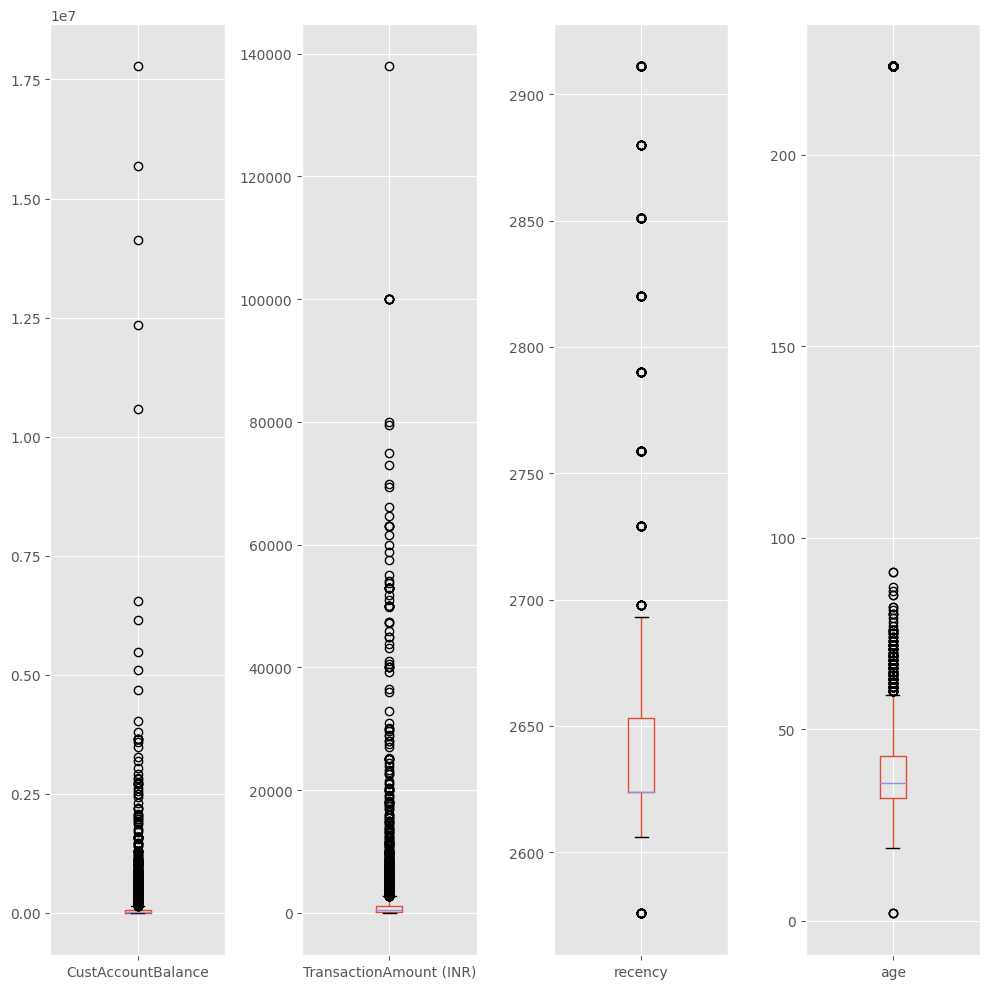

In [136]:
# Outlier Checking

list_columns = list(df.columns.values)

num_rows = 1
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df.boxplot(column_name, ax=ax.flatten()[i])
    

plt.tight_layout()
plt.show()

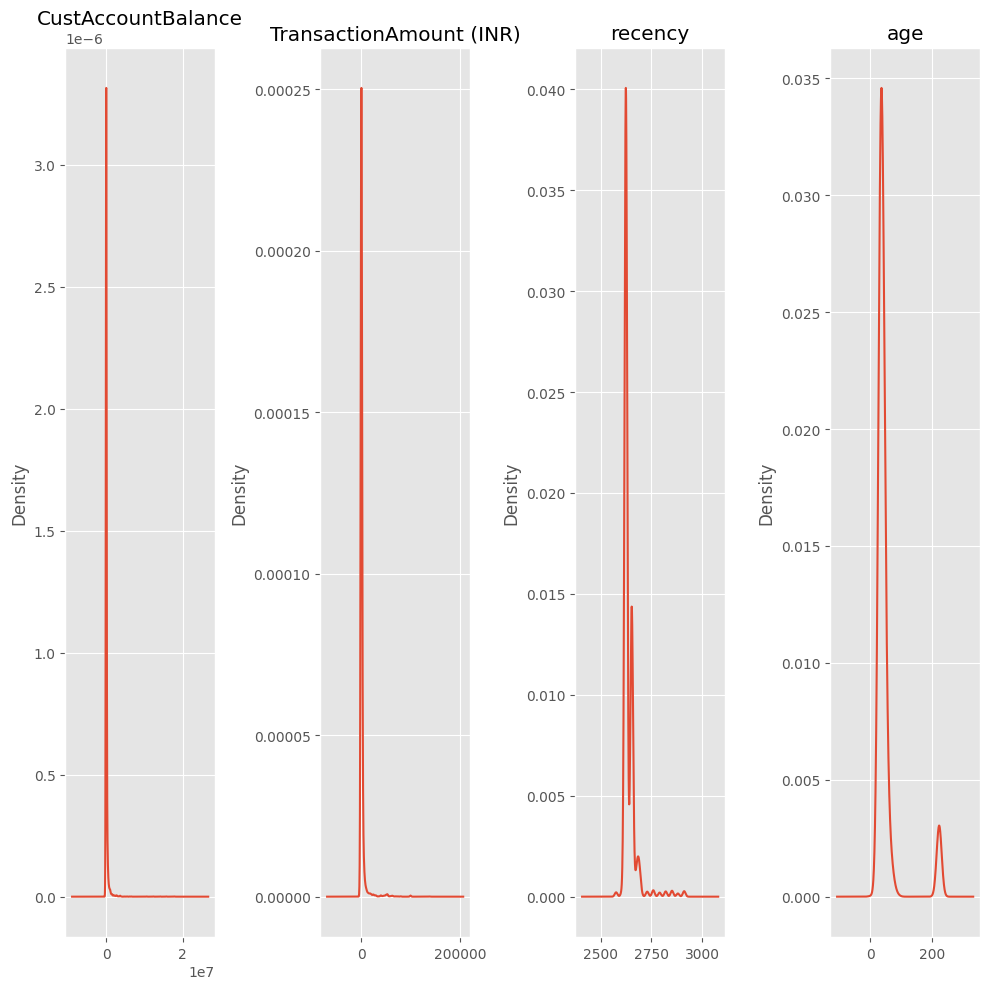

In [137]:
# Distribution of Data
 
list_columns = list(df.columns.values)

num_rows = 1
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

# Data Pre-processing 

In [138]:
df.corr()

,CustAccountBalance,TransactionAmount (INR),recency,age
CustAccountBalance,1.000000,0.106647,0.003507,0.129129
TransactionAmount (INR),0.106647,1.000000,-0.005118,0.113295
recency,0.003507,-0.005118,1.000000,-0.018151
age,0.129129,0.113295,-0.018151,1.000000


In [139]:
from sklearn.preprocessing import QuantileTransformer

quantile_trans = QuantileTransformer(n_quantiles=df.shape[0], output_distribution='normal')
df_scaled = quantile_trans.fit_transform(df)

In [140]:
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df_scaled

,CustAccountBalance,TransactionAmount (INR),recency,age
0,-0.034867,-1.714314,2.525843,-1.509677
1,-1.026543,2.218951,2.525843,1.401643
2,-0.034393,0.032020,2.525843,-2.086903
3,1.985270,1.046016,2.525843,1.046016
4,-0.583291,0.928642,2.525843,-0.219205
...,...,...,...,...
5281,-0.087619,1.980191,-2.537533,-0.219205
5282,0.968053,1.511904,-2.537533,5.199338
5283,-0.663663,-1.157850,-2.537533,-0.755178
5284,-0.477882,-0.153800,-2.537533,-0.994536


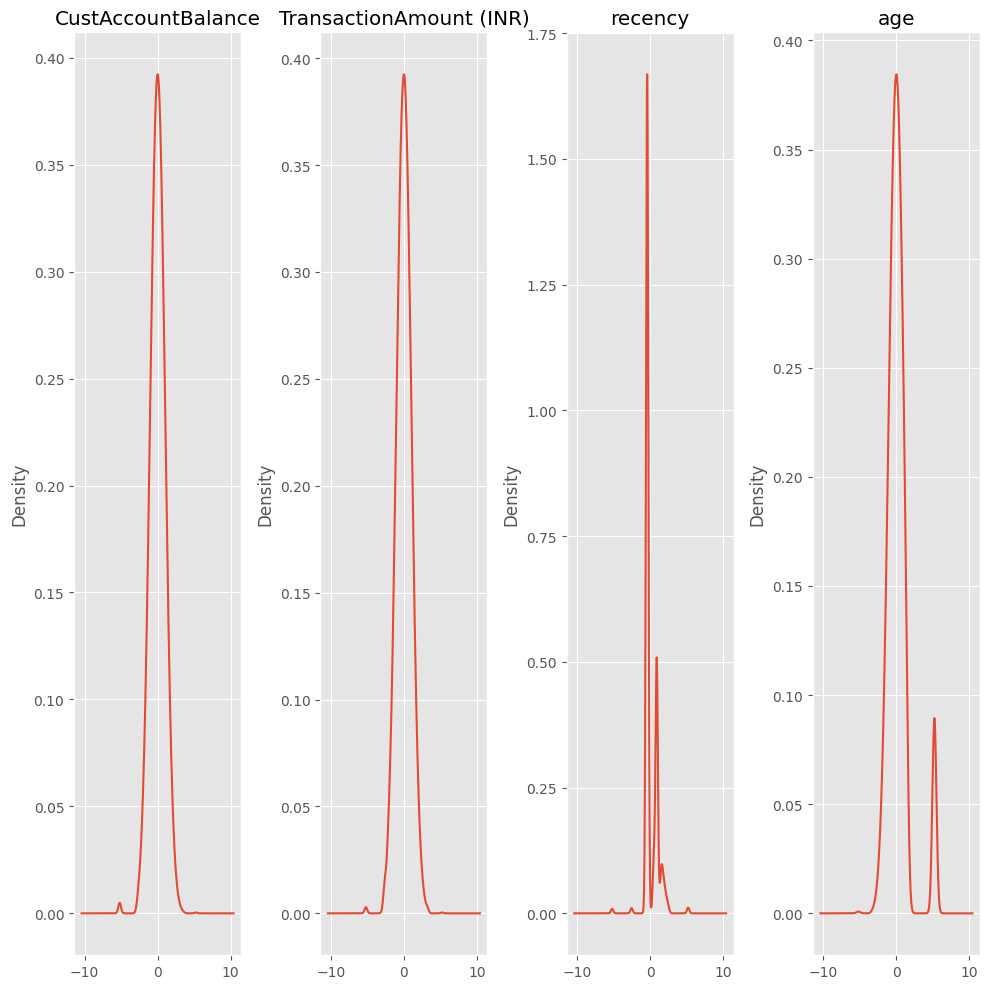

In [141]:
list_columns = list(df_scaled.columns.values)

num_rows = 1
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10,10))

for i, column_name in enumerate(list_columns):
    df_scaled[column_name].plot(ax=ax.flatten()[i], kind='kde')
    ax.flatten()[i].set_title(column_name)

plt.tight_layout()
plt.show()

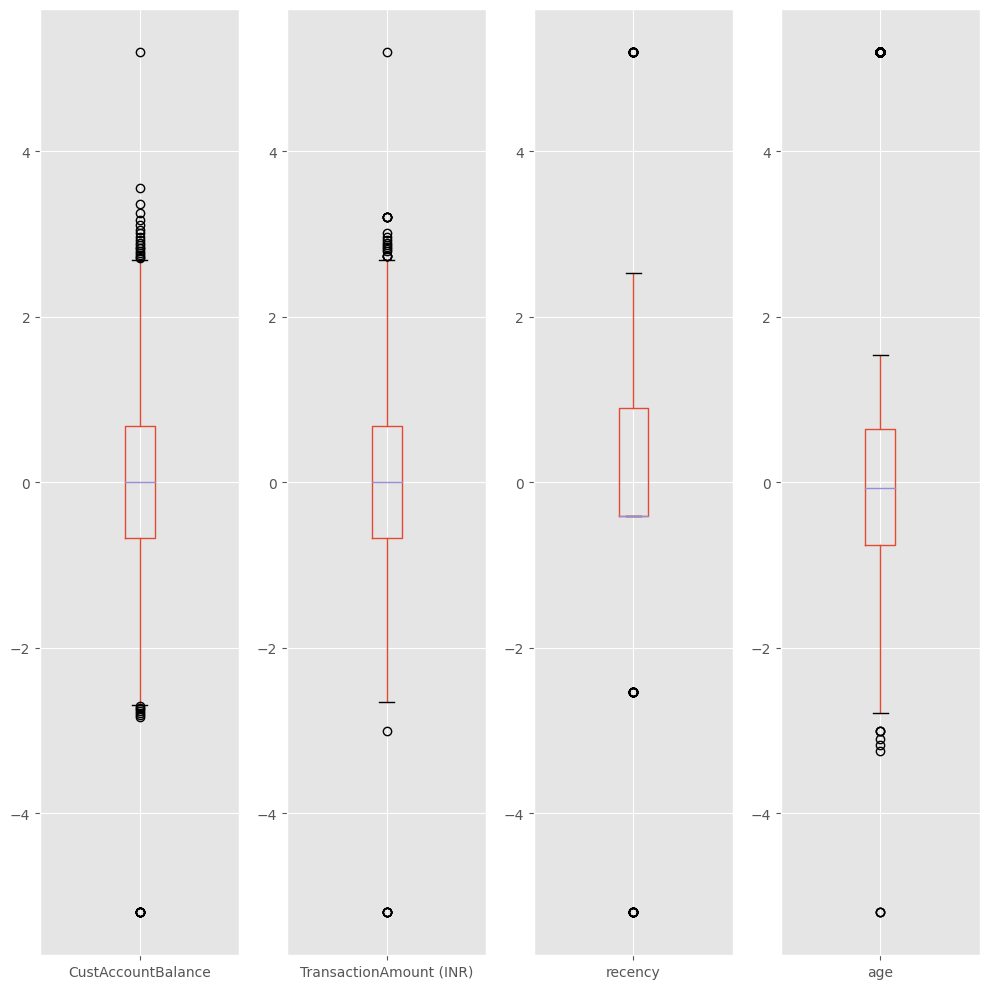

In [142]:
list_columns = list(df_scaled.columns.values)

num_rows = 1
num_cols = 4

fig, ax = plt.subplots(num_rows, num_cols, figsize=(10, 10))

for i, column_name in enumerate(list_columns):
    df_scaled.boxplot(column_name, ax=ax.flatten()[i])

plt.tight_layout()
plt.show()

In [143]:
# Outlier Persentation

for i, j in df_scaled.items():
    q1 = j.quantile(0.25)
    q3 = j.quantile(0.75)
    inter_q = q3 - q1

    j_col = j[(j <= q1 - 1.5 * inter_q) | (j >= q3 + 1.5 * inter_q)]
    percent = np.shape(j_col)[0] * 100.0 / np.shape(df)[0]
    print("Column %s outliers = %.2f" %(i, percent))

Column CustAccountBalance outliers = 0.72
Column TransactionAmount (INR) outliers = 0.51
Column recency outliers = 1.23
Column age outliers = 6.43


In [144]:
Q1 = df_scaled.quantile(0.25)
Q3 = df_scaled.quantile(0.75)
IQR = Q3 - Q1

new_df_filtered = df_scaled[~((df_scaled < (Q1 - 1.5 * IQR)) | (df_scaled > (Q3 + 1.5 * IQR))).any(axis=1)]
print(new_df_filtered)

      CustAccountBalance  TransactionAmount (INR)   recency       age
0              -0.034867                -1.714314  2.525843 -1.509677
1              -1.026543                 2.218951  2.525843  1.401643
2              -0.034393                 0.032020  2.525843 -2.086903
3               1.985270                 1.046016  2.525843  1.046016
4              -0.583291                 0.928642  2.525843 -0.219205
...                  ...                      ...       ...       ...
5276           -0.331077                -1.777435  0.901963 -0.558173
5277            0.367121                -0.790990  0.901963 -0.072393
5278           -0.182905                -1.298445  0.901963 -0.072393
5279            1.243150                 1.129123  0.901963  0.795538
5280           -0.292734                -0.198603  0.901963 -0.755178

[4835 rows x 4 columns]


In [145]:
new_df_filtered = pd.DataFrame(new_df_filtered, columns=df_scaled.columns)

new_df_filtered

,CustAccountBalance,TransactionAmount (INR),recency,age
0,-0.034867,-1.714314,2.525843,-1.509677
1,-1.026543,2.218951,2.525843,1.401643
2,-0.034393,0.032020,2.525843,-2.086903
3,1.985270,1.046016,2.525843,1.046016
4,-0.583291,0.928642,2.525843,-0.219205
...,...,...,...,...
5276,-0.331077,-1.777435,0.901963,-0.558173
5277,0.367121,-0.790990,0.901963,-0.072393
5278,-0.182905,-1.298445,0.901963,-0.072393
5279,1.243150,1.129123,0.901963,0.795538


# PEMODELAN

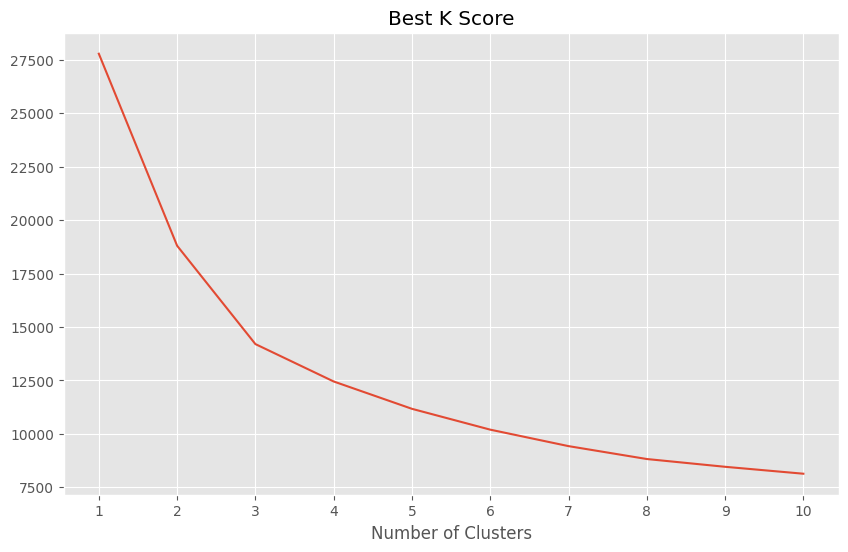

In [146]:
from sklearn.cluster import KMeans

score = []
k_value = range(1, 11)

for k in k_value:
    kmeans = KMeans(n_clusters= k, init='k-means++', random_state=42)
    kmeans.fit(df_scaled)
    cluster = kmeans.fit_predict(df_scaled)
    score.append(kmeans.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(k_value, score)
plt.xlabel('Number of Clusters')
plt.xticks(k_value)
plt.style.use('ggplot')
plt.title('Best K Score')
plt.show()

 For k = 2, the silhouette score is: [0.5814758731424062]
 For k = 3, the silhouette score is: [0.26223056720578347]
 For k = 4, the silhouette score is: [0.2432611963251809]
 For k = 5, the silhouette score is: [0.21548679383844954]
 For k = 6, the silhouette score is: [0.2167630236446399]
 For k = 7, the silhouette score is: [0.21817454586630236]
 For k = 8, the silhouette score is: [0.22612922517360712]


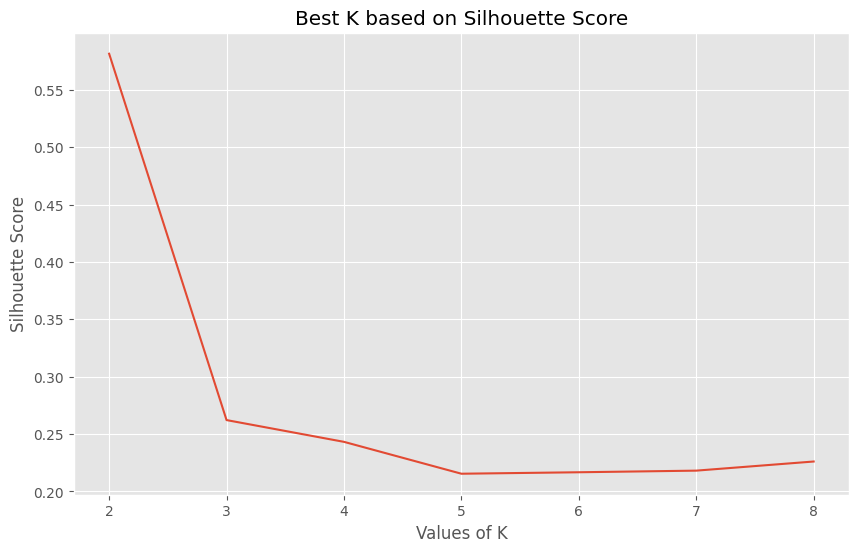

In [147]:
# Calculate Silhouette Score (Outlier dihapus)

from sklearn.metrics import silhouette_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    silhouette_avg = silhouette_score(df_scaled, cluster_labels)
    scores[k] = [silhouette_avg]

for k, value in scores.items():
    print(" For k = {}, the silhouette score is: {}".format(k, value))

key = list(scores.keys())
value = list(scores.values())

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(key, value)
plt.xlabel('Values of K')
plt.xticks(k_value)
plt.ylabel('Silhouette Score')
plt.style.use('ggplot')
plt.title('Best K based on Silhouette Score')
plt.show()

In [148]:
from sklearn.metrics import davies_bouldin_score

k_value = [2, 3, 4, 5, 6, 7, 8]
scores = {}

for k in k_value:
    kmeans = KMeans(n_clusters = k, random_state=42)
    kmeans.fit(df_scaled)
    cluster_labels = kmeans.predict(df_scaled)

    db_score = davies_bouldin_score(df_scaled, cluster_labels)
    scores[k] = [db_score]

for k, value in scores.items():
    print(" For k = {}, the davies-bouldin score is: {}".format(k, value))

 For k = 2, the davies-bouldin score is: [0.6127629262691299]
 For k = 3, the davies-bouldin score is: [1.2279202017213464]
 For k = 4, the davies-bouldin score is: [1.3218259686687448]
 For k = 5, the davies-bouldin score is: [1.2854148600177058]
 For k = 6, the davies-bouldin score is: [1.2239209932374167]
 For k = 7, the davies-bouldin score is: [1.1715489634055882]
 For k = 8, the davies-bouldin score is: [1.2014148987528503]


In [149]:
kmeans = KMeans(n_clusters=2, init='k-means++', n_init=10, max_iter=10000, random_state=42)
kmeans.fit(df_scaled)
df_scaled['cluster'] = kmeans.labels_

df_scaled

,CustAccountBalance,TransactionAmount (INR),recency,age,cluster
0,-0.034867,-1.714314,2.525843,-1.509677,1
1,-1.026543,2.218951,2.525843,1.401643,1
2,-0.034393,0.032020,2.525843,-2.086903,1
3,1.985270,1.046016,2.525843,1.046016,1
4,-0.583291,0.928642,2.525843,-0.219205,1
...,...,...,...,...,...
5281,-0.087619,1.980191,-2.537533,-0.219205,1
5282,0.968053,1.511904,-2.537533,5.199338,0
5283,-0.663663,-1.157850,-2.537533,-0.755178,1
5284,-0.477882,-0.153800,-2.537533,-0.994536,1


<Figure size 800x800 with 0 Axes>

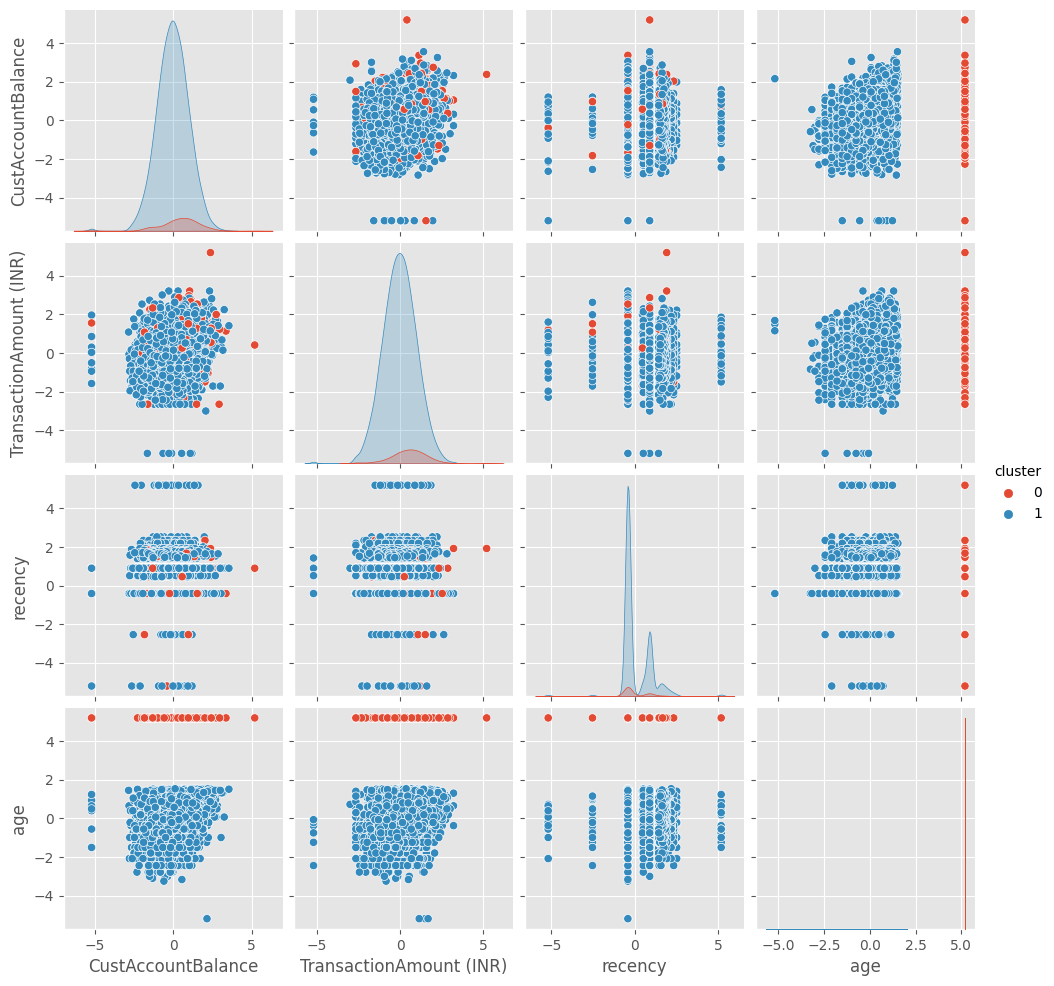

In [150]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_scaled, hue='cluster')

In [151]:
df_pca = df_scaled.loc[:, ~df_scaled.columns.isin(['cluster'])]
df_pca

,CustAccountBalance,TransactionAmount (INR),recency,age
0,-0.034867,-1.714314,2.525843,-1.509677
1,-1.026543,2.218951,2.525843,1.401643
2,-0.034393,0.032020,2.525843,-2.086903
3,1.985270,1.046016,2.525843,1.046016
4,-0.583291,0.928642,2.525843,-0.219205
...,...,...,...,...
5281,-0.087619,1.980191,-2.537533,-0.219205
5282,0.968053,1.511904,-2.537533,5.199338
5283,-0.663663,-1.157850,-2.537533,-0.755178
5284,-0.477882,-0.153800,-2.537533,-0.994536


In [152]:
df_scaled

,CustAccountBalance,TransactionAmount (INR),recency,age,cluster
0,-0.034867,-1.714314,2.525843,-1.509677,1
1,-1.026543,2.218951,2.525843,1.401643,1
2,-0.034393,0.032020,2.525843,-2.086903,1
3,1.985270,1.046016,2.525843,1.046016,1
4,-0.583291,0.928642,2.525843,-0.219205,1
...,...,...,...,...,...
5281,-0.087619,1.980191,-2.537533,-0.219205,1
5282,0.968053,1.511904,-2.537533,5.199338,0
5283,-0.663663,-1.157850,-2.537533,-0.755178,1
5284,-0.477882,-0.153800,-2.537533,-0.994536,1


In [153]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_pca)

df_pca

array([[-2.08446338,  0.68333208],
       [ 1.4167342 ,  0.01971867],
       [-2.13263858, -0.63063045],
       ...,
       [-1.35609546,  0.52180052],
       [-1.24798586, -0.32222852],
       [-1.82249773, -0.31385076]])

In [154]:
df_pca = pd.DataFrame(df_pca, columns=['PC 1', 'PC2'])
df_pca['cluster'] = df_scaled.loc[:, df_scaled.columns.isin(['cluster'])]

df_pca

,PC 1,PC2,cluster
0,-2.084463,0.683332,1
1,1.416734,0.019719,1
2,-2.132639,-0.630630,1
3,1.585233,-1.405111,1
4,-0.313133,-0.099375,1
...,...,...,...
5281,0.163638,-1.615991,1
5282,5.314250,0.065986,0
5283,-1.356095,0.521801,1
5284,-1.247986,-0.322229,1


<Figure size 800x800 with 0 Axes>

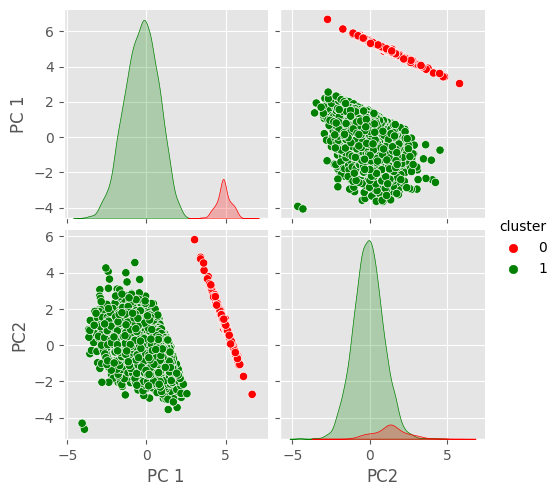

In [155]:
import seaborn as sns 

plt.figure(figsize=(8,8))
sns.pairplot(data=df_pca, hue='cluster', palette=['red', 'green'])